# Simulation analysis: 

This notebook illustrates how we can combine several libraries (pyvista, numpy, matplotlib, etc.) to carry out some basic N-dimensional data analysis.

## Study case: Turbulence-in-a-box in 2D

The study case is a set of data produced by a numerical (magnetohydrodynamical) simulation of 2D turbulence in a periodic domain. The gas in this simulation is isothermal, so it is described by this equation of state:

$$p = \rho\,c_{\rm iso}^2$$

where $\rho$ is the gas density and $c_{\rm iso}$ is its isothermal sound speed.

In this simulation, the gas is initially still and has a uniform density distribution. Then, turbulence is generated by appying a time-dependent, spatially-varying, stochastic force field. Such force field continuously injects mechanical energy into the box and maintains supersonic turbulence during the whole simulation.

The output files from the simulation are saved as VTK files:

https://www.dropbox.com/scl/fo/aip4lo4983phsyd5tcn77/ALvNSCjfQpzlbjrKmhP5Ex8?rlkey=m4ragdal7lagwczhtkvyqj0ty&dl=0

- At low resolution (recommended)

- At high resolution


Each VTK file contains several data arrays, which we want to analyse and visualise. In addition, these files are accompanied by additional descriptor files that contain information on"

- the physical (CGS) normalisation units of the problem, see **units.out**

- the simulation times, see second column of **vtk.out**.

- additional grid information, see **grid.out**

The structure of these files makes this problem ideal to practice data/image analysis.


### Physical units:

The VTK data files are written in code units by default, so we need to use the information from **units.out** to convert the data from code to CGS units. The fundamental normalisation parameters are:

- length, $L_0$

- velocity, $v_0$

- density, $\rho_0$

To convert from code units to physical units, we can multiply the variables by the normalisation parameters in CGS units, e.g. to get the density in CGS units:


$L_{cgs} = L\times L_0$, where $L$ is the length of the box in code units and $L_0$ comes from the **units.out** file.

$v_{cgs} = v\times v_0$, where $L$ is the velocity in code units and $v_0$ comes from the **units.out** file.


$\rho_{cgs} = \rho\times\rho_0$, where $\rho$ comes from the simulation and $\rho_0$ comes from the **units.out** file.

### Derived physical units:

Using the fundamental normalisation parameters, we can also find the derived normalisation parameters for:

- pressure, $p_0=\rho_0v_0^2$

- magnetic flux density, $B_0 = v_0\,\sqrt{4\,\pi\,\rho_0}$

Thus, to convert pressures and magnetic flux densities to CGS units, we proceed as follows:

$p_{cgs} = p\times p_0$,

$B_{cgs} = B\times B_0$.

### Time units:

In addition, the times can be retrieved from the second column of the **vtk.out** file in code units. To normalise them to CGS units, we can first calculate the normalisation factor for time as:

$t_0 = \frac{L_0}{v_0}$


## Tasks:

#### 1. Read the units.out file and assign the fundamental CGS normalisation parameters to python objects.


#### 2. Calculate the derived CGS normalisation parameters for pressure, magnetic flux density, and time.


#### 3. Read the second column of the vtk.out file and extract the simulation times in code units.  Then, normalise them to CGS units.


#### 4. Choose one of the VTK files (e.g. #10), open it, convert all the data arrays to CGS units, and save them into python objects.


#### 5. Calculate the thermal pressure of the gas in CGS units, using the isothermal EOS.


#### 6. Make the following maps in CGS units:

- Density + velocity vector field

- Thermal pressure

- Magnetic flux density magnitude + its vector field

#### 7. Make a histogram of the density field and fit an appropriate function using regression methods.


#### 8. Make a 2D histogram of pressure versus density, and check if it folows the expected EOS.


#### 9. Create a function that calculates the following quantities and prints them into a pandas data frame with time in the first column and headers:

 - density average 
 
 - density standard deviation
 
 - thermal pressure average
 
 - thermal pressure standard deviation

#### 1. Read the units.out file and assign the fundamental CGS normalisation parameters to python objects.

In [129]:
fname = "/Users/wbandabarragan/Library/CloudStorage/Dropbox/Shared_folder/TURB_DRIVE_SUP_hr/"

In [130]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import pandas as pd

In [131]:
# Read units.out file

df_units = pd.read_csv(fname + "units.out")

print(df_units)

  variable  normalisation   units
0    rho_0   1.660000e-24  g/cm^3
1      v_0   1.000000e+06    cm/s
2      L_0   3.086000e+18      cm
3    c_iso   1.000000e+06    cm/s


In [132]:
# Place these values into python objects:

rho_0 = np.array(df_units.loc[df_units["variable"] == "rho_0"]["normalisation"])
v_0 = np.array(df_units.loc[df_units["variable"] == "v_0"]["normalisation"])
L_0 = np.array(df_units.loc[df_units["variable"] == "L_0"]["normalisation"])
c_iso = np.array(df_units.loc[df_units["variable"] == "c_iso"]["normalisation"])

print(rho_0, v_0, L_0, c_iso)

[1.66e-24] [1000000.] [3.086e+18] [1000000.]


#### 2. Calculate the derived CGS normalisation parameters for pressure, magnetic flux density, and time.

In [133]:
# Let's get t_0 in CGS units
t_0 = L_0/v_0

# Let's get the pressure in CGS units
p_0 = rho_0*v_0**2

# Let's get B_0
B_0 = v_0*np.sqrt(4*np.pi*rho_0)

print(t_0, p_0, B_0)

[3.086e+12] [1.66e-12] [4.56729408e-06]


#### 3. Read the second column of the vtk.out file and extract the simulation times in code units.  Then, normalise them to CGS units.

In [134]:
# Use pandas to retrieve times

df_times = pd.read_csv(fname + "vtk.out", sep = "\s+", header = None)

print(df_times)

      0         1         2     3            4       5    6    7    8    9   \
0      0  0.000000  0.000100     0  single_file  little  rho  vx1  vx2  Bx1   
1      1  0.018194  0.001919    31  single_file  little  rho  vx1  vx2  Bx1   
2      2  0.038971  0.002852    39  single_file  little  rho  vx1  vx2  Bx1   
3      3  0.059698  0.002287    47  single_file  little  rho  vx1  vx2  Bx1   
4      4  0.078446  0.001866    56  single_file  little  rho  vx1  vx2  Bx1   
..   ...       ...       ...   ...          ...     ...  ...  ...  ...  ...   
96    96  1.919941  0.000126  8928  single_file  little  rho  vx1  vx2  Bx1   
97    97  1.939916  0.000126  9083  single_file  little  rho  vx1  vx2  Bx1   
98    98  1.959914  0.000106  9256  single_file  little  rho  vx1  vx2  Bx1   
99    99  1.979907  0.000104  9450  single_file  little  rho  vx1  vx2  Bx1   
100  100  2.000000  0.000048  9636  single_file  little  rho  vx1  vx2  Bx1   

      10  
0    Bx2  
1    Bx2  
2    Bx2  
3    Bx

In [135]:
# Get the second column
time_code = np.array(df_times.iloc[:,1])
#print(time_code)

# Convert this to CGS units
t_cgs = time_code*t_0

print(t_cgs)

[0.00000000e+00 5.61477332e+10 1.20263302e+11 1.84227689e+11
 2.42084665e+11 3.04692260e+11 3.69704960e+11 4.31680172e+11
 4.93471768e+11 5.54914336e+11 6.15829507e+11 6.78043885e+11
 7.39747837e+11 8.02078248e+11 8.63901321e+11 9.25217672e+11
 9.86730910e+11 1.04892646e+12 1.11060881e+12 1.17225506e+12
 1.23402814e+12 1.29562099e+12 1.35701789e+12 1.41875980e+12
 1.48073162e+12 1.54294908e+12 1.60444473e+12 1.66563425e+12
 1.72774216e+12 1.78972447e+12 1.85128368e+12 1.91322433e+12
 1.97495668e+12 2.03610422e+12 2.09799365e+12 2.15994078e+12
 2.22124201e+12 2.28331875e+12 2.34497456e+12 2.40700840e+12
 2.46815626e+12 2.53007438e+12 2.59207428e+12 2.65344186e+12
 2.71509428e+12 2.77700839e+12 2.83868086e+12 2.90068539e+12
 2.96228936e+12 3.02404608e+12 3.08599074e+12 3.14730956e+12
 3.20931347e+12 3.27058292e+12 3.33282445e+12 3.39414944e+12
 3.45590956e+12 3.51796285e+12 3.57944523e+12 3.64102944e+12
 3.70303027e+12 3.76488914e+12 3.82645793e+12 3.88812855e+12
 3.94978992e+12 4.011349

#### 4. Choose one of the VTK files (e.g. #10), open it, convert all the data arrays to CGS units, and save them into python objects.

In [136]:
# Get the data into a mesh
mesh = pv.read(fname +"data.0010.vtk")

print(mesh)
print(mesh.array_names)

RectilinearGrid (0x33cc7d9a0)
  N Cells:      40000
  N Points:     40401
  X Bounds:     -2.000e+00, 2.000e+00
  Y Bounds:     -2.000e+00, 2.000e+00
  Z Bounds:     0.000e+00, 0.000e+00
  Dimensions:   201, 201, 1
  N Arrays:     5
['rho', 'vx1', 'vx2', 'Bx1', 'Bx2']


In [137]:
# Get data arrays in code units:

rho = pv.get_array(mesh, "rho", preference = 'cell')
vx1 = pv.get_array(mesh, "vx1", preference = 'cell')
vx2 = pv.get_array(mesh, "vx2", preference = 'cell')
Bx1 = pv.get_array(mesh, "Bx1", preference = 'cell')
Bx2 = pv.get_array(mesh, "Bx2", preference = 'cell')

print(rho.shape)

(40000,)


In [138]:
print(rho[0], rho[0]*rho_0)

0.51192087 [8.49788643e-25]


In [139]:
# Normalise the quantities to CGS units

rho_cgs = rho*rho_0

vx1_cgs = vx1*v_0
vx2_cgs = vx2*v_0

Bx1_cgs = Bx1*B_0
Bx2_cgs = Bx2*B_0


In [140]:
# Reshape them into 2D arrays

rho_cgs2D = rho_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

vx1_cgs2D = vx1_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx2_cgs2D = vx2_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

Bx1_cgs2D = Bx1_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx2_cgs2D = Bx2_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

In [141]:
print(rho.shape, rho_cgs2D.shape)

(40000,) (200, 200)


### Create the grid in physical units:

In [142]:
print(mesh.bounds, mesh.bounds*L_0)


(-2.0, 2.0, -2.0, 2.0, 0.0, 0.0) [-6.172e+18  6.172e+18 -6.172e+18  6.172e+18  0.000e+00  0.000e+00]


In [143]:
# Create coordinate vectors:
x = np.linspace(mesh.bounds[0], mesh.bounds[1],\
               mesh.dimensions[1] - 1)*L_0
y = np.linspace(mesh.bounds[2], mesh.bounds[3],\
               mesh.dimensions[0] - 1)*L_0

#print(x,y)
# Generate Grid
x_2d, y_2d = np.meshgrid(x, y)

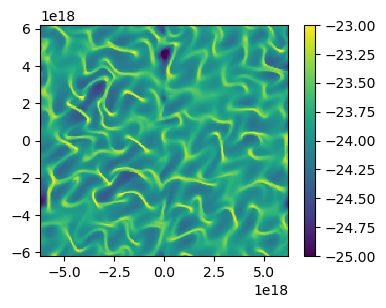

In [144]:
# Plotting the density
plt.figure(figsize=(4,3))

z_dens = plt.pcolor(x_2d, y_2d, np.log10(rho_cgs2D), vmin = -25, vmax=-23)
#z_dens = plt.contourf(x_2d, y_2d, rho_cgs2D, 20)

plt.colorbar(z_dens)

plt.show()


In [145]:
# Calculate the magnitude of B

mag_B = np.sqrt(Bx1_cgs2D**2 + Bx2_cgs2D**2)

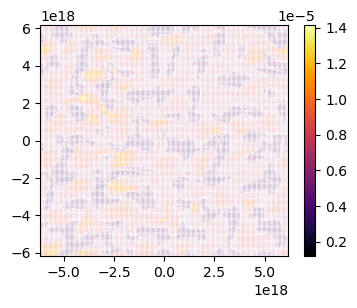

In [146]:
# Plot the magnetic flux density (B)

plt.figure(figsize = (4,3))

Z = plt.quiver(x_2d, y_2d, Bx1_cgs2D, Bx2_cgs2D, mag_B, cmap = "inferno")

plt.colorbar(Z)

plt.xlim(x[0], x[-1])
plt.ylim(y[0], y[-1])

plt.show()


#### 5. Calculate the thermal pressure of the gas in CGS units, using the isothermal EOS.

$$p = \rho\,c_{iso}^2$$

In [147]:
# Pressure

p_cgs2D = rho_cgs2D*c_iso**2

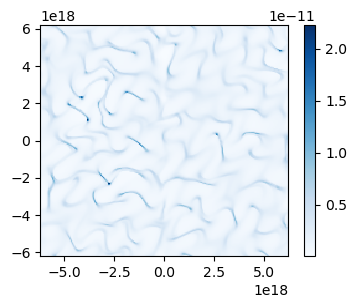

In [148]:
# Plot the thermal pressure

plt.figure(figsize = (4,3))

Z = plt.pcolor(x_2d, y_2d, p_cgs2D, cmap = "Blues")

plt.colorbar(Z)

plt.show()

#### 7. Make a histogram of the density field and fit an appropriate function using regression methods.

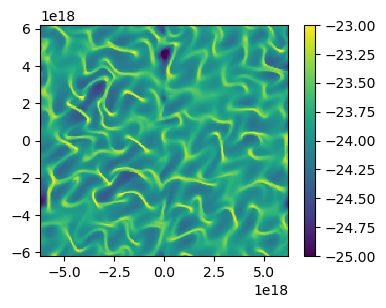

In [149]:
# Plotting the density
plt.figure(figsize=(4,3))

z_dens = plt.pcolor(x_2d, y_2d, np.log10(rho_cgs2D), vmin = -25, vmax=-23)
#z_dens = plt.contourf(x_2d, y_2d, rho_cgs2D, 20)

plt.colorbar(z_dens)

plt.show()


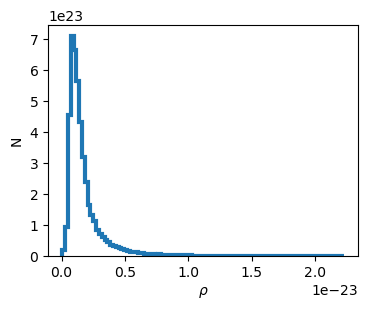

In [150]:
# Histogram (flatten array)

plt.figure(figsize=(4,3))

n, bins, patches = plt.hist(rho_cgs, 100, histtype = "step", lw = 3.0, density = True)

plt.xlabel(r"$\rho$")
plt.ylabel(r"N")

plt.show()

In [151]:
print(n)
print(n.shape)

[1.86546012e+22 9.16997266e+22 4.54228302e+23 7.11796652e+23
 6.66733429e+23 5.64133122e+23 4.32764273e+23 3.19375763e+23
 2.37228092e+23 1.64182966e+23 1.31256471e+23 1.13163756e+23
 8.22600488e+22 7.15842228e+22 6.13579053e+22 5.02325708e+22
 4.43889608e+22 3.49492830e+22 3.15779696e+22 2.71952620e+22
 2.46105884e+22 2.07897664e+22 1.93288639e+22 1.61823047e+22
 1.33728768e+22 1.20243514e+22 1.12377116e+22 9.88918620e+21
 7.41688965e+21 5.73123291e+21 4.83221598e+21 4.49508464e+21
 4.38270752e+21 3.48369059e+21 4.83221598e+21 2.92180501e+21
 2.58467367e+21 2.24754232e+21 1.57327962e+21 1.68565674e+21
 1.91041097e+21 1.46090251e+21 1.46090251e+21 7.86639811e+20
 8.99016927e+20 8.99016927e+20 5.61885579e+20 2.24754232e+20
 3.37131348e+20 3.37131348e+20 1.12377116e+20 2.24754232e+20
 3.37131348e+20 1.12377116e+20 0.00000000e+00 0.00000000e+00
 2.24754232e+20 1.12377116e+20 1.12377116e+20 0.00000000e+00
 3.37131348e+20 2.24754232e+20 3.37131348e+20 0.00000000e+00
 4.49508464e+20 1.123771

In [152]:
print(bins)
print(bins.shape)

[4.78118425e-26 2.70277064e-25 4.92742286e-25 7.15207508e-25
 9.37672729e-25 1.16013795e-24 1.38260317e-24 1.60506839e-24
 1.82753362e-24 2.04999884e-24 2.27246406e-24 2.49492928e-24
 2.71739450e-24 2.93985972e-24 3.16232495e-24 3.38479017e-24
 3.60725539e-24 3.82972061e-24 4.05218583e-24 4.27465105e-24
 4.49711628e-24 4.71958150e-24 4.94204672e-24 5.16451194e-24
 5.38697716e-24 5.60944238e-24 5.83190761e-24 6.05437283e-24
 6.27683805e-24 6.49930327e-24 6.72176849e-24 6.94423371e-24
 7.16669894e-24 7.38916416e-24 7.61162938e-24 7.83409460e-24
 8.05655982e-24 8.27902504e-24 8.50149027e-24 8.72395549e-24
 8.94642071e-24 9.16888593e-24 9.39135115e-24 9.61381638e-24
 9.83628160e-24 1.00587468e-23 1.02812120e-23 1.05036773e-23
 1.07261425e-23 1.09486077e-23 1.11710729e-23 1.13935381e-23
 1.16160034e-23 1.18384686e-23 1.20609338e-23 1.22833990e-23
 1.25058643e-23 1.27283295e-23 1.29507947e-23 1.31732599e-23
 1.33957251e-23 1.36181904e-23 1.38406556e-23 1.40631208e-23
 1.42855860e-23 1.450805

### Mid-points:

In [153]:
# Shift arrays:
x0 = 0.5 * ( bins[1:] + bins[:-1] ) 

print(x0.shape)

(100,)


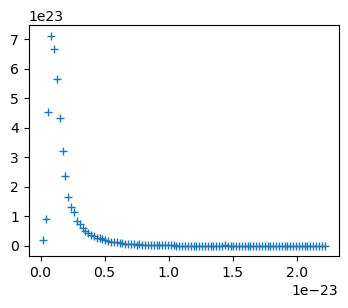

In [154]:
# New histogram plot:

plt.figure(figsize=(4,3))

plt.plot(x0, n, lw=3.0, marker = "+", linestyle= " ")

plt.show()

### Regression:

A good model is a log-normal distro:

$\rho_x=\frac 1 {x\sigma\sqrt{2\pi}}\ \exp\left( - \frac{\left(\ln \left( x \right) -\mu\right)^2}{2\sigma^2}\right)$

In [155]:
# Define the model for the fit

def log_normal(x, mu, s):
    """
    Function to define a log-normal distro.
    """
    
    y_model = ((np.exp(-(np.log(x) - mu)**2 / (2*s**2)))/(x * s * np.sqrt(2*np.pi)))
    
    return y_model

In [156]:
import scipy.optimize as opt

In [157]:
#print(x0)
#print(n)

In [158]:
# Fitting:

coef, cova = opt.curve_fit(log_normal, x0, n)

print(coef)

[1. 1.]


/opt/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [159]:
# Renormalise the axes

n1 = n/1.e24

x1 = x0/1.e-24

In [160]:
# Fitting:

coef, cova = opt.curve_fit(log_normal, x1, n1)

print(coef)

[0.22148939 0.52915693]


In [161]:
# Evalueta the regression parameters:

n_fit = log_normal(x1, coef[0], coef[1])

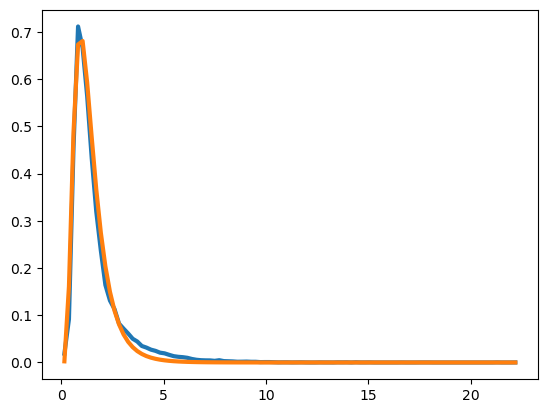

In [162]:
# New histogram plot:

plt.figure()

plt.plot(x1, n1, lw=3.0)
plt.plot(x1, n_fit, lw=3.0)

plt.show()

#### 8. Make a 2D histogram of pressure versus density, and check if it folows the expected EOS.

In [163]:
p_cgs = p_cgs2D.reshape(rho_cgs.shape)

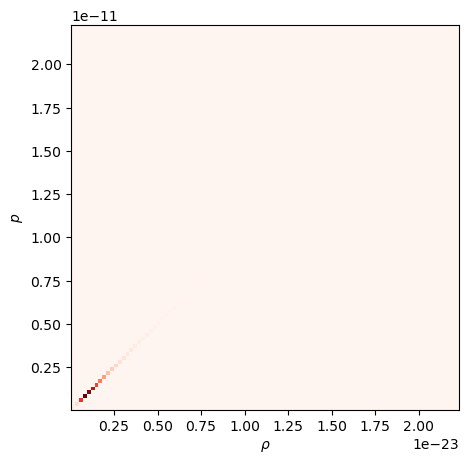

In [164]:
plt.figure(figsize = (5,5))

plt.hist2d(rho_cgs, p_cgs, bins=100, cmap = "Reds")

plt.xlabel(r"$\rho$")
plt.ylabel(r"$p$")

plt.show()

### Add the EOS:

$$p = \rho\,c_{\rm iso}^2$$

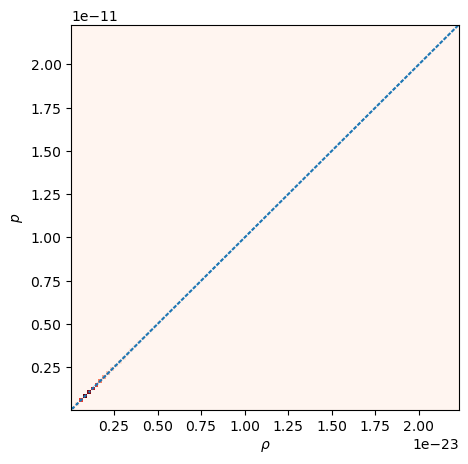

In [165]:
plt.figure(figsize = (5,5))

plt.hist2d(rho_cgs, p_cgs, bins=100, cmap = "Reds")
plt.plot(rho_cgs, rho_cgs*c_iso**2, linestyle=":", label ="Isothermal EOS")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$p$")

plt.show()

#### 9. Create a function that calculates the following quantities and prints them into a pandas data frame with time in the first column and headers:

 - density average 
 
 - density standard deviation
 
 - thermal pressure average
 
 - thermal pressure standard deviation

In [166]:
# Calculate diagnostics

av_dens = np.mean(rho_cgs2D)
st_dens = np.std(rho_cgs2D)

av_pres = np.mean(p_cgs2D)
st_pres = np.std(p_cgs2D)

print(t_cgs[0])

t10= t_cgs[20]

0.0


In [167]:
# Data frame
df = pd.DataFrame({"time": t10, "Av. Dens.": av_dens, \
                  "St. Dens.": st_dens, "Av. Pres.": av_pres, \
                  "St. Pres.": st_pres}, index=[0])

print(df)

           time     Av. Dens.     St. Dens.     Av. Pres.     St. Pres.
0  1.234028e+12  1.660000e-24  1.290801e-24  1.660000e-12  1.290801e-12


In [168]:
# Save the data frame:
df.to_csv("data.csv", sep=',', float_format='{:.2e}'.format)

### 10. The purpose of this exercise is to carry out data analysis looping over the full range of VTK files in the simulation folder. We want to calculate some integrated quantities:

- Time

- Average density
- Standard deviation of density
- Average RMS Speed
- RMS Mach number

In [169]:
# IO function

def io_data(fname):
    """
    I/O function for VTK files
    Input: fname -> file name as str
    Outputs: rho_cgs2d -> 2d density
             vx1_cgs2d, vx2_cgs2d -> 2D velocity components
    """
    # Get the data into a mesh
    mesh = pv.read(fname)
    
    # Get the flattened arrays
    rho = pv.get_array(mesh, "rho", preference = 'cell')
    vx1 = pv.get_array(mesh, "vx1", preference = 'cell')
    vx2 = pv.get_array(mesh, "vx2", preference = 'cell')
    
    # Normalise them to CGS units
    rho_cgs = rho*rho_0
    vx1_cgs = vx1*v_0
    vx2_cgs = vx2*v_0
    
    # Reshape them into 2D arrays
    rho_cgs2d = rho_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx1_cgs2d = vx1_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx2_cgs2d = vx2_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    
    return rho_cgs2d, vx1_cgs2d, vx2_cgs2d
    

In [170]:
# Create a loop

# 1. Empty lists -> columns of the CSV file
t_array = t_cgs
d_list = []
s_list = []
v_list = []
m_list = []

# Define folder:

# 2. For loop over time
for j in range(0, len(t_cgs)):
    #print(j)
    
    filename = fname + "data.0{:03d}.vtk".format(j)
    #print(filename)
    
    # 3. Open the file j with pandas
    rho_2d, vx1_2d, vx2_2d = io_data(filename)
    #print(rho_2d.shape)
    
    # 4. Perform calculations needed
    
    # Average densities:
    d_list.append(np.mean(rho_2d))
    
    # Sigmas of the densities:
    s_list.append(np.std(rho_2d))
    
    # Velocity magnitude
    vel_2d = np.sqrt(vx1_2d**2 + vx2_2d**2)
    
    # Average speed
    v_list.append(np.mean(vel_2d))
    
    # RMS Mach number
    rms_2d = np.mean(vel_2d)/c_iso
    
    m_list.append(rms_2d)
    
d_array = np.array(d_list)
s_array = np.array(s_list)
v_array = np.array(v_list)
m_array = np.array(m_list).reshape(101,)
print(m_array.shape)
#print(t_array.shape)

print(m_array.reshape(101,).shape)

(101,)
(101,)


### 11. Make plots of all quantities versus time.

#### a) Average density versus time:

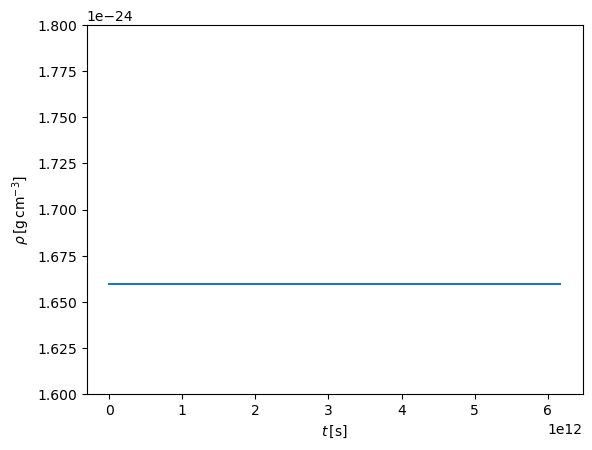

In [171]:
# Figure env
plt.figure()

plt.plot(t_array, d_array)

plt.ylim(1.6e-24, 1.8e-24)

plt.xlabel(r"$t\,\rm[s]$")
plt.ylabel(r"$\rho \,\rm[g\,cm^{-3}]$")

plt.show()

#### b) Std. Dev. of density versus time:

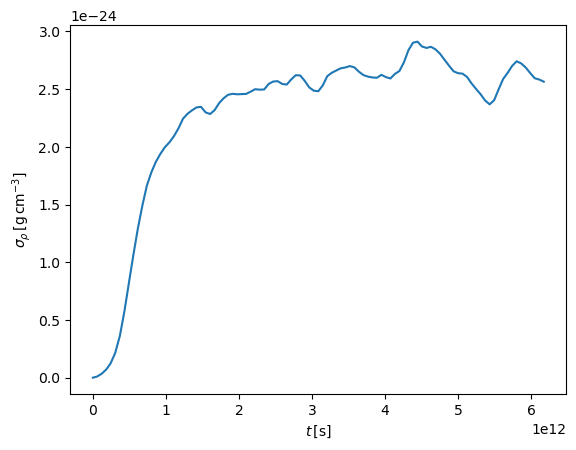

In [172]:
# Figure env
plt.figure()

plt.plot(t_array, s_array)

#plt.ylim(1.6e-24, 1.8e-24)

plt.xlabel(r"$t\,\rm[s]$")
plt.ylabel(r"$\sigma_{\rho} \,\rm[g\,cm^{-3}]$")

plt.show()

#### c) RMS velocity



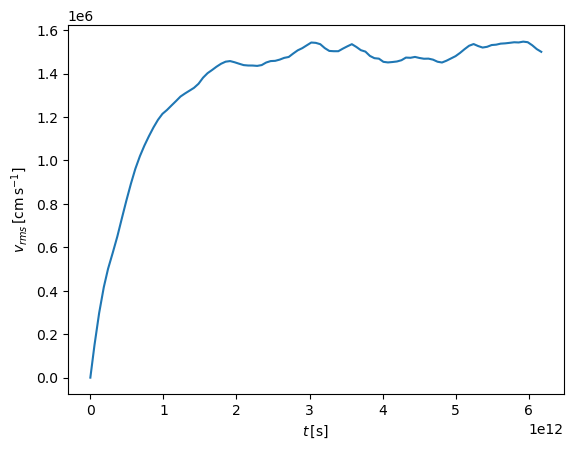

In [173]:
# Figure env
plt.figure()

plt.plot(t_array, v_array)

#plt.ylim(1.6e-24, 1.8e-24)

plt.xlabel(r"$t\,\rm[s]$")
plt.ylabel(r"$v_{rms} \,\rm[cm\,s^{-1}]$")

plt.show()

#### d) RMS Mach number

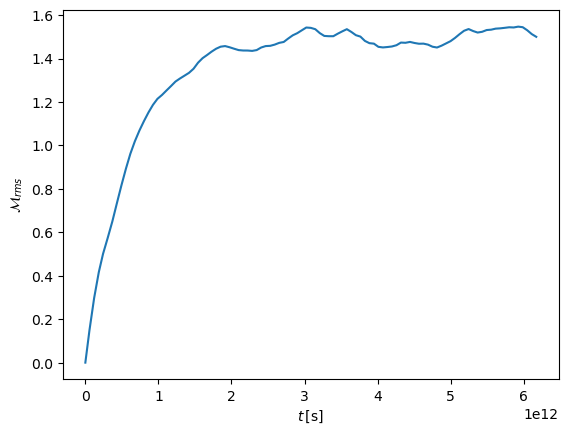

In [174]:
# Figure env
plt.figure()

plt.plot(t_array, m_array)

#plt.ylim(1.6e-24, 1.8e-24)

plt.xlabel(r"$t\,\rm[s]$")
plt.ylabel(r"${\cal M}_{rms}$")

plt.show()

### 12. Save the postprocessed data into a CSV file

In [175]:
# Data frame
df_final = pd.DataFrame({"time": t_array, "Av. Dens.": d_array, \
                  "St. Dens.": s_array, "RMS Vel.": v_array, "RMS Mach": m_array})

print(df_final)


# Save the data frame:
df_final.to_csv("data_final.csv", sep=',', float_format='{:.4e}'.format)

             time     Av. Dens.     St. Dens.      RMS Vel.  RMS Mach
0    0.000000e+00  1.660000e-24  0.000000e+00  0.000000e+00  0.000000
1    5.614773e+10  1.660000e-24  8.829004e-27  1.486755e+05  0.148676
2    1.202633e+11  1.660000e-24  3.356346e-26  2.972095e+05  0.297210
3    1.842277e+11  1.660000e-24  7.116430e-26  4.165647e+05  0.416565
4    2.420847e+11  1.660000e-24  1.226100e-25  5.006722e+05  0.500672
..            ...           ...           ...           ...       ...
96   5.924938e+12  1.660000e-24  2.687114e-24  1.546728e+06  1.546728
97   5.986581e+12  1.660000e-24  2.639525e-24  1.544162e+06  1.544162
98   6.048295e+12  1.660000e-24  2.594358e-24  1.530108e+06  1.530108
99   6.109993e+12  1.660000e-24  2.583461e-24  1.512493e+06  1.512493
100  6.172000e+12  1.660000e-24  2.564523e-24  1.499864e+06  1.499864

[101 rows x 5 columns]


In [178]:
# Create a loop

# 1. Empty lists -> columns of the CSV file
t_array2 = t_cgs
d_list2 = []
s_list2 = []
v_list2 = []
m_list2 = []

# Define folder:
fname2 = "/Users/wbandabarragan/Library/CloudStorage/Dropbox/Shared_folder/TURB_DRIVE_SUB_hr/"

# 2. For loop over time
for j in range(0, len(t_cgs)):
    #print(j)
    
    filename = fname2 + "data.0{:03d}.vtk".format(j)
    #print(filename)
    
    # 3. Open the file j with pandas
    rho_2d, vx1_2d, vx2_2d = io_data(filename)
    #print(rho_2d.shape)
    
    # 4. Perform calculations needed
    
    # Average densities:
    d_list2.append(np.mean(rho_2d))
    
    # Sigmas of the densities:
    s_list2.append(np.std(rho_2d))
    
    # Velocity magnitude
    vel_2d = np.sqrt(vx1_2d**2 + vx2_2d**2)
    
    # Average speed
    v_list2.append(np.mean(vel_2d))
    
    # RMS Mach number
    rms_2d = np.mean(vel_2d)/c_iso
    
    m_list2.append(rms_2d)
    
d_array2 = np.array(d_list2)
s_array2 = np.array(s_list2)
v_array2 = np.array(v_list2)
m_array2 = np.array(m_list2).reshape(101,)
print(m_array2.shape)
#print(t_array.shape)

print(m_array2.reshape(101,).shape)

(101,)
(101,)


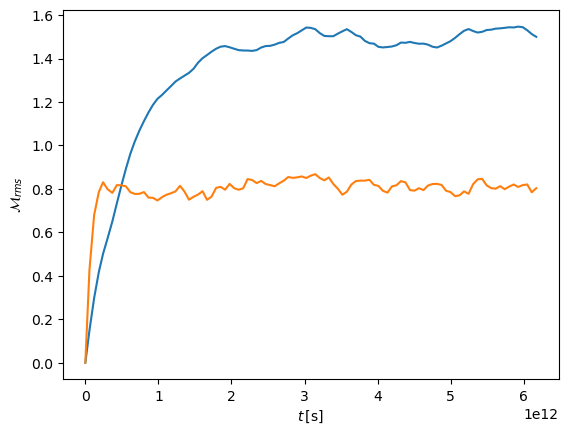

In [179]:
# Figure env
plt.figure()

plt.plot(t_array, m_array)
plt.plot(t_array2, m_array2)

#plt.ylim(1.6e-24, 1.8e-24)

plt.xlabel(r"$t\,\rm[s]$")
plt.ylabel(r"${\cal M}_{rms}$")

plt.show()